In [1]:
import sys
import os


sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..", "src")))

In [2]:
from weather.data_loader import load_data
from sklearn.preprocessing import LabelEncoder
import importlib
from scipy.io import arff
import weather.preprocessing
importlib.reload(weather.preprocessing)
from weather.preprocessing import plot_correlation_heatmap

In [3]:
file_path = os.path.join('..', 'data', 'processed', 'after_preprocessed.csv')
df_eda = load_data(file_path)

In [4]:
df_eda.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [7]:
df_eda.dtypes

Temperature             float64
Humidity                  int64
Wind Speed              float64
Precipitation (%)       float64
Cloud Cover              object
Atmospheric Pressure    float64
UV Index                  int64
Season                   object
Visibility (km)         float64
Location                 object
Weather Type             object
dtype: object

In [5]:
df_encoding = df_eda.copy()

In [6]:
kategorical_column = ['Cloud Cover', 'Season', 'Location']
for i in kategorical_column:
    print(f"Kolom: {i}", df_encoding[i].unique())

Kolom: Cloud Cover ['partly cloudy' 'clear' 'overcast' 'cloudy']
Kolom: Season ['Winter' 'Spring' 'Summer' 'Autumn']
Kolom: Location ['inland' 'mountain' 'coastal']


In [7]:
# ENCODE dengan label encoding
for col in kategorical_column:
    le = LabelEncoder()
    df_encoding[col] = le.fit_transform(df_encoding[col])

print(df_encoding[kategorical_column].head())

   Cloud Cover  Season  Location
0            3       3         1
1            3       1         1
2            0       1         2
3            0       1         0
4            2       3         2


In [8]:
df_encoding['Weather Type'] = df_encoding['Weather Type'].map({
    'Sunny': 1,
    'Cloudy': 2,
    'Rainy': 3,
    'Snowy' : 4
})

In [9]:
df_encoding

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,3,1010.82,2,3,3.5,1,3
1,39.0,96,8.5,71.0,3,1011.43,7,1,10.0,1,2
2,30.0,64,7.0,16.0,0,1018.72,5,1,5.5,2,1
3,38.0,83,1.5,82.0,0,1026.25,7,1,1.0,0,1
4,27.0,74,17.0,66.0,2,990.67,1,3,2.5,2,3
...,...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74,14.5,71.0,2,1003.15,1,2,1.0,2,3
13196,-1.0,76,3.5,23.0,1,1067.23,1,3,6.0,0,4
13197,30.0,77,5.5,28.0,2,1012.69,3,0,9.0,0,2
13198,3.0,76,10.0,94.0,2,984.27,0,3,2.0,1,4


In [10]:
df_encoding.dtypes

Temperature             float64
Humidity                  int64
Wind Speed              float64
Precipitation (%)       float64
Cloud Cover               int32
Atmospheric Pressure    float64
UV Index                  int64
Season                    int32
Visibility (km)         float64
Location                  int32
Weather Type              int64
dtype: object

In [22]:
# CORRELATION
corr = df_encoding.corr()
corr

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
Temperature,1.000000,-0.207969,-0.070022,-0.287206,-0.224642,0.209188,0.374773,-0.377942,0.250751,-0.196108,-0.655390
Humidity,-0.207969,1.000000,0.406079,0.638631,0.277199,-0.120653,-0.342694,0.189145,-0.479969,0.079968,0.515906
Wind Speed,-0.070022,0.406079,1.000000,0.443770,0.183863,-0.077757,-0.068147,0.058676,-0.311828,0.014091,0.320190
Precipitation (%),-0.287206,0.638631,0.443770,1.000000,0.267368,-0.177444,-0.291601,0.210372,-0.457444,0.091911,0.641751
Cloud Cover,-0.224642,0.277199,0.183863,0.267368,1.000000,-0.096133,-0.347301,0.076947,-0.169604,0.030464,0.374154
Atmospheric Pressure,0.209188,-0.120653,-0.077757,-0.177444,-0.096133,1.000000,0.154128,-0.126795,0.120182,-0.077053,-0.260535
UV Index,0.374773,-0.342694,-0.068147,-0.291601,-0.347301,0.154128,1.000000,-0.201870,0.362922,-0.100510,-0.535249
Season,-0.377942,0.189145,0.058676,0.210372,0.076947,-0.126795,-0.201870,1.000000,-0.231691,0.147115,0.399188
Visibility (km),0.250751,-0.479969,-0.311828,-0.457444,-0.169604,0.120182,0.362922,-0.231691,1.000000,-0.093642,-0.509031
Location,-0.196108,0.079968,0.014091,0.091911,0.030464,-0.077053,-0.100510,0.147115,-0.093642,1.000000,0.185883


In [23]:
target_corr = corr['Weather Type'].drop('Weather Type') 
sorted_corr = target_corr.abs().sort_values(ascending=False) 

print("Ranking Korelasi Fitur terhadap Weather Type:")
print(sorted_corr)

Ranking Korelasi Fitur terhadap Weather Type:
Temperature             0.655390
Precipitation (%)       0.641751
UV Index                0.535249
Humidity                0.515906
Visibility (km)         0.509031
Season                  0.399188
Cloud Cover             0.374154
Wind Speed              0.320190
Atmospheric Pressure    0.260535
Location                0.185883
Name: Weather Type, dtype: float64


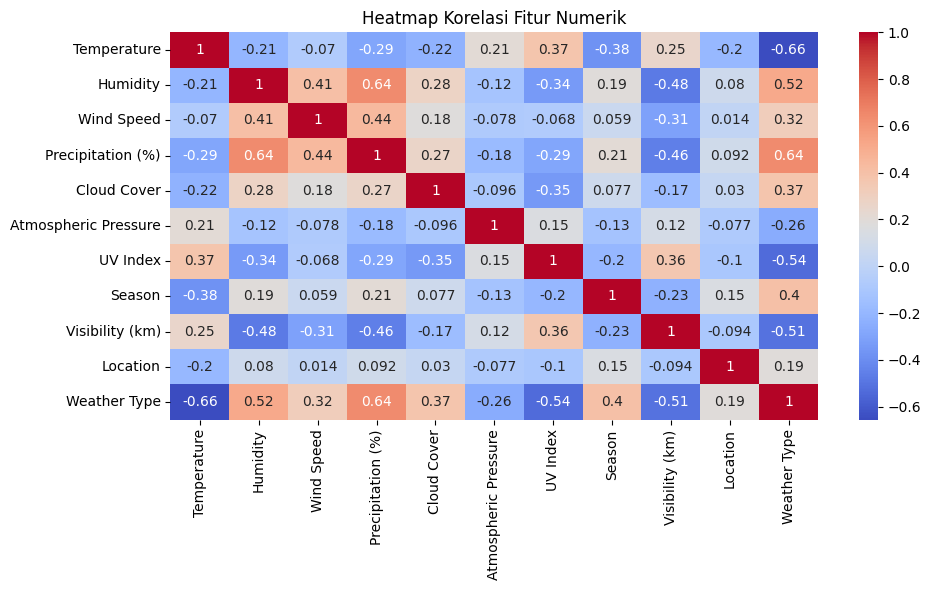

In [24]:
plot_correlation_heatmap(df_encoding)

In [ ]:
folder_path = os.path.join('..', 'data', 'processed')

# file_csv = os.path.join(folder_path, 'after_encoded.csv')
# df_encoding.to_csv(file_csv, index=False)

# print(f"Data berhasil disimpan di: {file_path}")


file_arff = os.path.join(folder_path, 'after_encoding.arff')
data_values = df_encoding.values  
attributes = [(col, 'NUMERIC') for col in df_encoding.columns]
arff.write_arff(file_arff, data_values, names=df_encoding.columns)

print(f"Data berhasil disimpan di: {file_arff}")

Data berhasil disimpan di: ..\data\processed\after_preprocessed.csv


AttributeError: module 'scipy.io.arff' has no attribute 'write_arff'